# NC4: Phân cụm thượng viện dựa trên lịch sử bỏ phiếu.

File `senate.csv` chứa lịch sử bỏ phiếu của các thượng nghị sĩ Mỹ khóa 114 đối với các dự luật.

**Câu hỏi:** Liệu có thể dùng K-means để chia các thượng nghị sĩ thành 2 cụm sao cho các thành viên cùng đảng vào chung cụm nhiều nhất có thể? Hơn nữa, liệu có thể dùng K-means để tìm ra các phe phái nhỏ trong từng đảng với lịch sử bỏ phiếu tương tự nhau?

(Đề tuyển trại sinh PiMA 2021 - Phần Tự nghiên cứu)

## Trả lời:

K-means có thể được dùng để phân các thượng nghị sĩ vào 2 cụm sao cho các thành viên cùng đảng vào chung cụm nhiều nhất có thể, do:
- Các thành viên cùng đảng thường có cách bỏ phiếu giống nhau cho cùng một đạo luật.
- Lịch sử bỏ phiếu của mỗi nghị sĩ được đánh các số 1, 0.5 và 0 tương ứng cho phiếu Thuận, Trắng và Chống, thuận lợi cho việc sử dụng K-means.

Ngoài ra để tìm ra các phe phái nhỏ hơn trong từng đảng với lịch sử bỏ phiếu tương tự nhau, ta có thể đi tìm số k cụm lớn hơn 2 trong bài toán K-means. Một cách lựa chọn số k này là sử dụng phương pháp Điểm cùi trỏ (Elbow Method).

## Import các thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Tổng quan dữ liệu

In [3]:
votes = pd.read_csv('data/senate.csv')
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
votes.shape

(100, 18)

Dữ liệu có 100 hàng là lịch sử bỏ phiếu của 100 thượng nghị sĩ.

## Sử dụng thuật toán K-means với số cụm là 2

In [4]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(votes.iloc[:, 3:])

Chọn n_cluster - số cụm muốn phân là 2. Dữ liệu đưa vào là các các cột từ `00001` đến cụm `00047`.

In [5]:
labels = kmeans_model.labels_

In [6]:
pd.crosstab(labels, votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


Kết quả phân cụm K-means đưa ra khá tốt: Tất cả các thượng nghị sĩ đảng Republican (R) đã về một cụm và chỉ có 3 nghị sĩ đảng Democratic (D) bị phân sang cụm khác.

## Tìm các phe phái nhỏ trong từng đảng

Em sẽ sử dụng phương pháp điểm cùi trỏ để xác định số cụm trong tập dữ liệu.

Tư tưởng của phương pháp này là tìm số cụm k sao cho khi thêm một cụm khác thì không làm thay đổi tổng bình phương khoảng cách giữa các điểm dữ liệu trong một cụm với trọng tâm cụm đó không thay đổi nhiều, tức là việc phân nhỏ dữ liệu hơn nữa không có ý nghĩa đáng kể nữa.

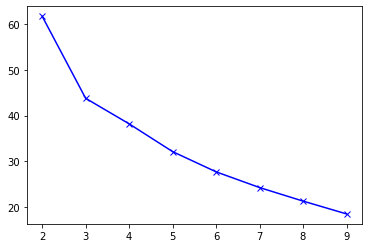

In [7]:
K = range(2, 10)
sum_distances = []

for k in K:
  k_mean = KMeans(n_clusters=k)
  k_mean.fit(votes.iloc[:, 3:])
  sum_distances.append(k_mean.inertia_)

plt.plot(K, sum_distances, 'bx-')
plt.show()

Điểm cùi trỏ chính là n=3. Ta sẽ thực hiện thuật K-means với số cụm là 3.

In [8]:
k_means_3 = KMeans(n_clusters=3, random_state=1).fit(votes.iloc[:, 3:])
labels_3 = k_means_3.labels_

In [9]:
pd.crosstab(labels_3, votes['party'])

party,D,I,R
row_0,,,
0,7,0,2
1,0,0,52
2,37,2,0


Dựa vào lịch sử bỏ phiếu của 100 thượng nghị sĩ Mỹ đối với các dự luật, thuật K-means đã phát hiện được hai phe phái trong nội bộ đảng Democratic (D).